#  Simulação Quântica de Tomada de Decisão sob Incerteza
## Controle de Qualidade na Indústria Farmacêutica com Qiskit
**Aluno:** HealyTcs  
**Turma:** 2ECA  

---

###  Introdução
Neste trabalho, utilizamos a biblioteca Qiskit para simular um circuito quântico que representa um processo de tomada de decisão sob incerteza, inspirado em cenários reais de controle de qualidade na indústria farmacêutica. O objetivo é demonstrar como conceitos fundamentais da computação quântica, como superposição e emaranhamento, podem ser aplicados para modelar situações onde há incerteza na padronização de embalagens, impactando indicadores-chave de desempenho (KPIs) industriais.

A simulação utiliza portas Hadamard e CNOT para criar estados de incerteza e correlação entre qubits, refletindo a dependência entre variáveis do processo industrial. Ao final, analisamos os resultados por meio de um histograma, discutindo as implicações para a tomada de decisão.

In [1]:
# Instale a dependência para visualização do circuito
!pip install -q pylatexenc

In [2]:
# Importando as bibliotecas necessárias
from qiskit import QuantumCircuit, transpile  # Criação e compilação de circuitos quânticos
from qiskit_aer import AerSimulator           # Simulador de circuitos quânticos
from qiskit.visualization import plot_histogram  # Visualização dos resultados
import matplotlib.pyplot as plt               # Plotagem de gráficos

###  Construção do Circuito Quântico
O circuito a seguir simula a incerteza e a dependência entre variáveis do processo industrial.

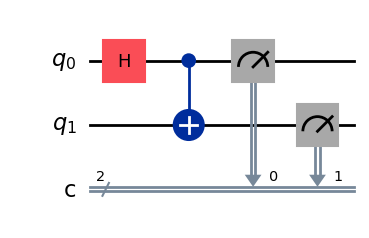

In [13]:
# Criando um circuito quântico com 2 qubits e 2 bits clássicos
qc = QuantumCircuit(2, 2)  # 2 qubits e 2 bits clássicos

# Porta Hadamard no qubit 0 (superposição)
qc.h(0)

# Porta CNOT: emaranhamento entre qubit 0 e 1
qc.cx(0, 1)

# Medição dos dois qubits
qc.measure([0, 1], [0, 1])

# Visualização do circuito
qc.draw('mpl')

###  Simulação do Circuito e Coleta de Resultados
Utilizamos o AerSimulator para simular 1024 execuções do circuito, obtendo a distribuição estatística dos resultados.

In [27]:
# Simulação com AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

# Verificando os resultados
print(counts)

{'11': 506, '00': 518}


### Visualização dos Resultados
O histograma abaixo mostra a frequência de cada resultado possível após a medição dos qubits.

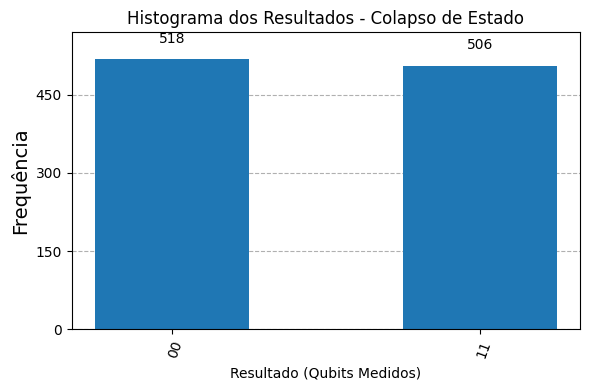

In [28]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

fig, ax = plt.subplots(figsize=(6,4))
plot_histogram(counts, ax=ax)
ax.set_title("Histograma dos Resultados - Colapso de Estado")
ax.set_xlabel("Resultado (Qubits Medidos)")
ax.set_ylabel("Frequência")
plt.tight_layout()
plt.show()

###  Salvando o Histograma
O gráfico gerado pode ser salvo para inclusão em relatórios ou apresentações.

In [29]:
# Salvando o histograma em 'images/histograma.png'
import os
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

os.makedirs('images', exist_ok=True)
fig, ax = plt.subplots(figsize=(6,4))
plot_histogram(counts, ax=ax)
ax.set_title("Histograma dos Resultados - Colapso de Estado")
ax.set_xlabel("Resultado (Qubits Medidos)")
ax.set_ylabel("Frequência")
plt.tight_layout()
fig.savefig('images/histograma.png')
plt.close(fig)

---

## Conceitos Quânticos Utilizados
- **Superposição:** O Hadamard cria um estado incerto entre 0 e 1.
- **Emaranhamento:** O CNOT faz com que o qubit 1 dependa do qubit 0.
- **Colapso da função de onda:** Ao medir, o sistema colapsa para 00 ou 11.
- **Qiskit:** Framework da IBM para computação quântica.

##  Relação com a Indústria Farmacêutica
Este experimento simula a incerteza na padronização de embalagens, um desafio real em processos industriais. A abordagem quântica permite modelar e analisar cenários complexos, auxiliando na tomada de decisão e na otimização de KPIs como conformidade e eficiência.

## Conclusão
A simulação quântica demonstrou como conceitos fundamentais da computação quântica podem ser aplicados para representar e analisar incertezas em processos industriais. O uso de superposição e emaranhamento permite explorar cenários de decisão que seriam difíceis de modelar classicamente, trazendo novas perspectivas para o controle de qualidade na indústria farmacêutica.